C:\Users\benra\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Using defined time windows: {'2015-2025': (0, 10), '2015-2035': (0, 20), '2015-2045': (0, 30), '2015-2055': (0, 40), '2015-2065': (0, 50), '2015-2075': (0, 60), '2015-2085': (0, 70), '2015-2100': (0, 85)}

--- Starting Data Loading for 'lithk' ---

Processing file 1/20: lithk_GIS_AWI_ISSM1_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM1

Processing file 2/20: lithk_GIS_AWI_ISSM2_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM2

Processing file 3/20: lithk_GIS_AWI_ISSM3_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM3

Processing file 4/20: lithk_GIS_BGC_BISICLES_exp05.nc
  Successfully loaded 'lithk' for model: BGC-BISICLES

Processing file 5/20: lithk_GIS_GSFC_ISSM_exp05.nc
  Successfully loaded 'lithk' for model: GSFC-ISSM

Processing file 6/20: lithk_GIS_ILTS_PIK_SICOPOLIS1_exp05.nc
  FIXED: Dropped duplicate 'x' coordinates for lithk_GIS_ILTS_PIK_SICOPOLIS1_exp05.nc.
  Successfully loaded 'lithk' for model: ILTSPIK- SICOPOLIS1

Processing file 7/20

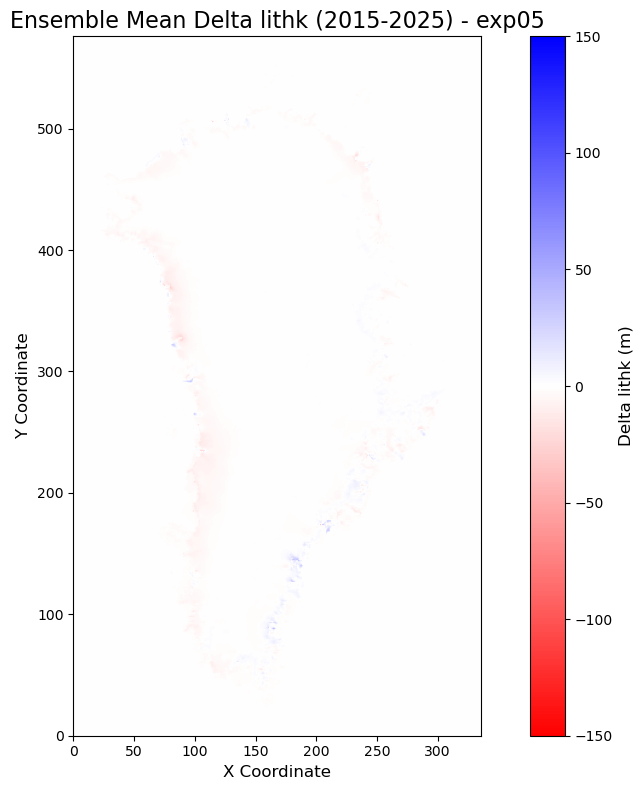

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2025.png

Processing time window: 2015-2035
  Calculated ensemble mean delta 'lithk' for 2015-2035.


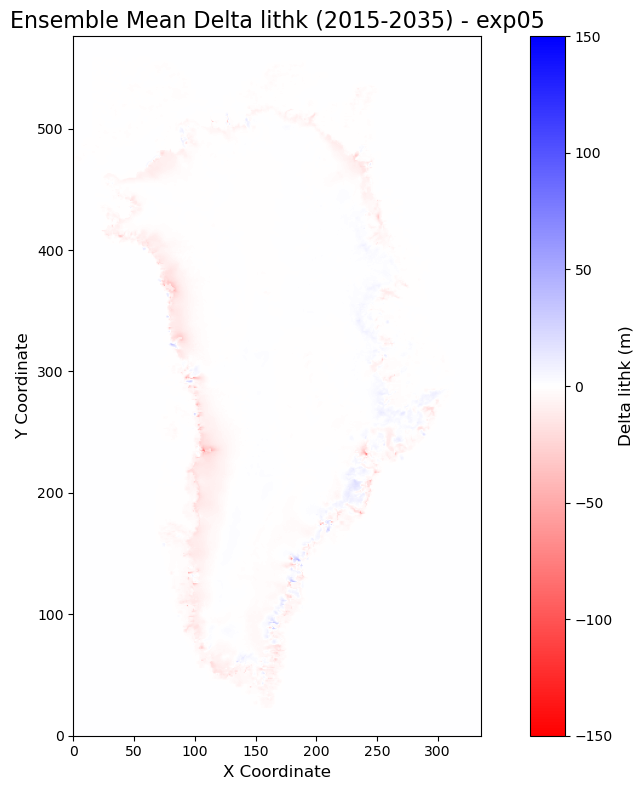

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2035.png

Processing time window: 2015-2045
  Calculated ensemble mean delta 'lithk' for 2015-2045.


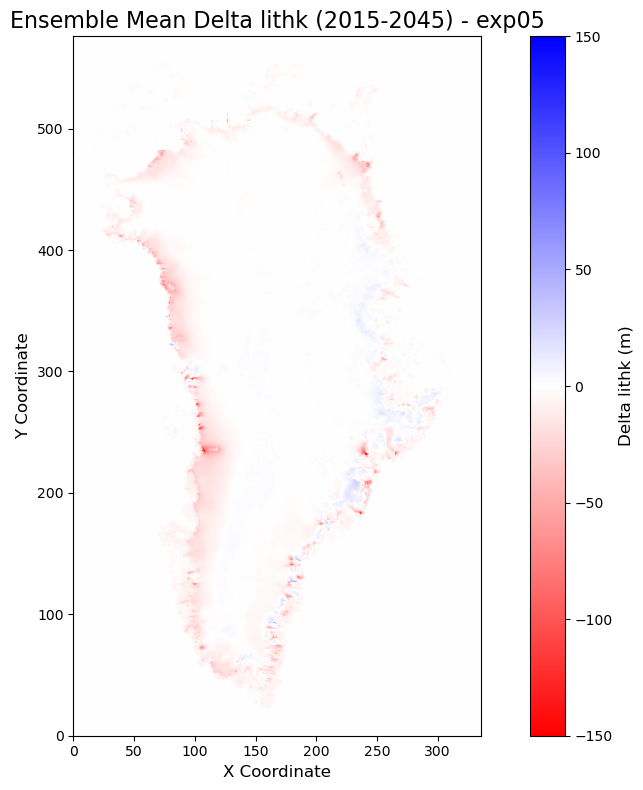

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2045.png

Processing time window: 2015-2055
  Calculated ensemble mean delta 'lithk' for 2015-2055.


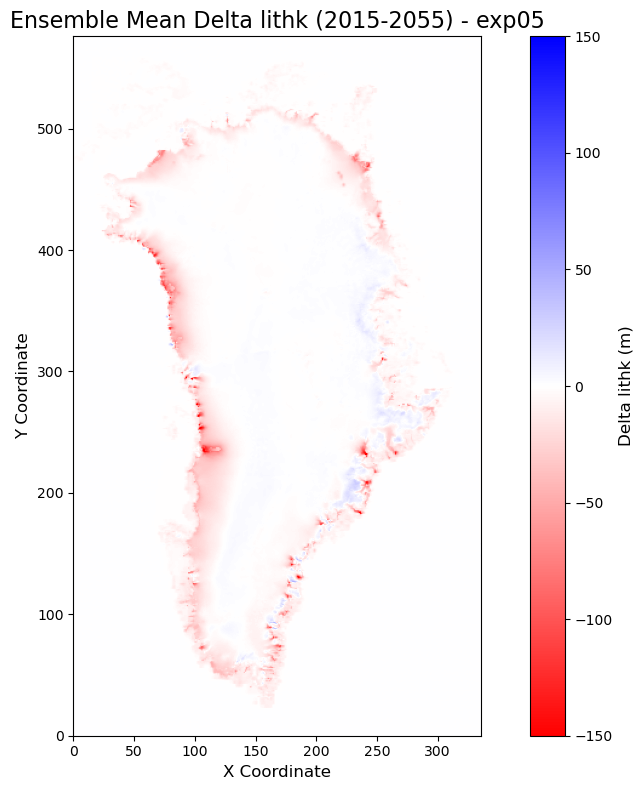

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2055.png

Processing time window: 2015-2065
  Calculated ensemble mean delta 'lithk' for 2015-2065.


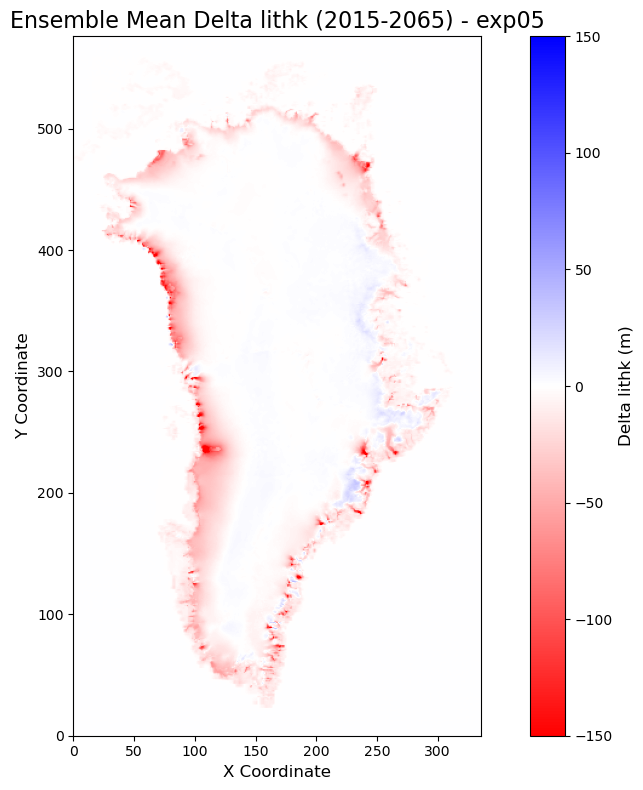

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2065.png

Processing time window: 2015-2075
  Calculated ensemble mean delta 'lithk' for 2015-2075.


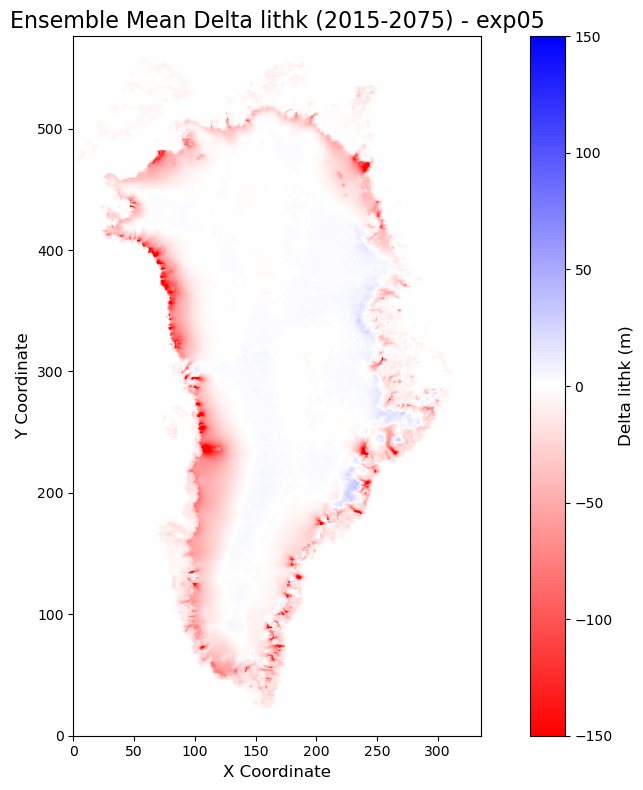

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2075.png

Processing time window: 2015-2085
  Calculated ensemble mean delta 'lithk' for 2015-2085.


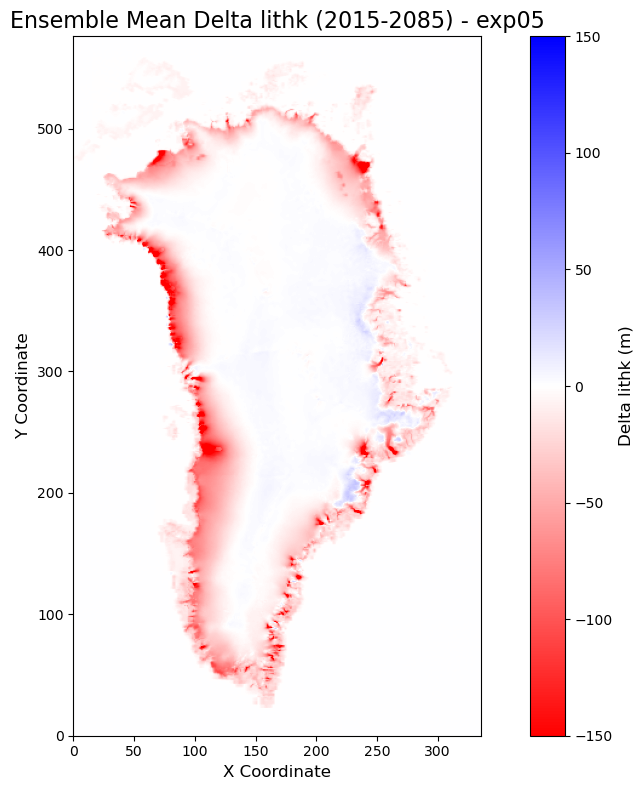

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2085.png

Processing time window: 2015-2100
  Calculated ensemble mean delta 'lithk' for 2015-2100.


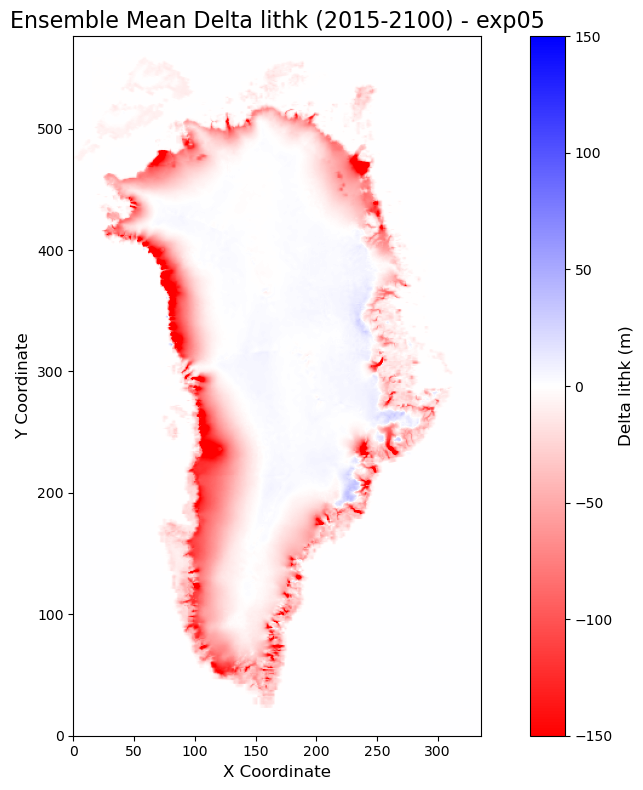

  Plot saved: Research_Plots\exp05_lithk_ensemble_plots\ensemble_mean_delta_lithk_exp05_2015-2100.png

--- Finished calculating and plotting ensemble mean delta 'lithk' for all time windows ---


In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # For model name standardization
from skimage.transform import resize # For resizing delta arrays to a uniform grid

# --- Configuration for lithk data ---
netcdf_dir = r"C:\Users\benra\lithk_exp05" # Assuming this is still the relevant folder
exp_id = 'exp05' # Assuming the experiment ID remains 'exp05'
lithk_var_name = 'lithk' # Variable name specifically for this task

# Define the standardization function (re-used from your previous code)
def standardize_model_name(model_name_from_netcdf):
    """
    Transforms a model name from the NetCDF derived format
    to match the 'Model ID' format in the characteristics CSV.
    """
    if model_name_from_netcdf == 'ILTS_PIK_SICOPOLIS1':
        return 'ILTSPIK- SICOPOLIS1'
    elif model_name_from_netcdf == 'ILTS_PIK_SICOPOLIS2':
        return 'ILTSPIK- SICOPOLIS2'
    
    return model_name_from_netcdf.replace('_', '-')

# Placeholder for time_windows (adjust based on your actual data's time steps/years)
# These indices (start_idx, end_idx) refer to the position in the 'time' dimension of your xarray DataArray.
# Define time windows (decades as suggested)
time_windows = { 
    '2015-2025': (0, 10),   # indices for 2015-2025
    '2015-2035': (0, 20),   # indices for 2015-2035  
    '2015-2045': (0, 30),   # indices for 2015-2045
    '2015-2055': (0, 40),   # indices for 2015-2055
    '2015-2065': (0, 50),   # indices for 2015-2065
    '2015-2075': (0, 60),   # indices for 2015-2075
    '2015-2085': (0, 70),   # indices for 2015-2085
    '2015-2100': (0, 85)    # full time series
}
print(f"Using defined time windows: {time_windows}")


# --- 1. Data Loading for 'lithk' ---
print(f"\n--- Starting Data Loading for '{lithk_var_name}' ---")
lithk_netcdf_files = [os.path.join(netcdf_dir, f) for f in os.listdir(netcdf_dir) if f.endswith('.nc')]

lithk_participating_models = []
lithk_var_list = [] # This will store the loaded 'lithk' xarray DataArrays

for i, file_path in enumerate(lithk_netcdf_files):
    base_filename = os.path.basename(file_path)
    # Check if the filename contains the lithk_var_name, case-insensitively
    if f'{lithk_var_name}_GIS_' not in base_filename:
        # print(f"  Skipping {base_filename}: Does not contain '{lithk_var_name}' in filename pattern.")
        continue # Skip files that are not for 'lithk'

    print(f"\nProcessing file {i+1}/{len(lithk_netcdf_files)}: {base_filename}")
    
    # Extract raw model ID from filename (similar to your previous logic)
    model_id_raw = base_filename.replace('.nc', '')
    model_id_raw = model_id_raw.replace(f'{lithk_var_name}_GIS_', '')
    
    if model_id_raw.endswith(f'_{exp_id}'):
        model_id_raw = model_id_raw.replace(f'_{exp_id}', '')
        
    model_id_raw = re.sub(r'_\d+$', '', model_id_raw) # Remove trailing '_digits'
    
    standardized_model_id = standardize_model_name(model_id_raw)
    
    try:
        # Open dataset with robustness for corrupted files (decode_coords=False for duplicate 'x' fix)
        ds = xr.open_dataset(file_path, decode_times=False, decode_coords=False)
        
        # Apply the fix for duplicate 'x' coordinates if necessary
        if 'x' in ds.coords and ds.indexes['x'].duplicated().any():
            print(f"  WARNING: Duplicate 'x' coordinates found in {base_filename}. Attempting to fix by dropping duplicates.")
            ds = ds.isel(x=~ds.indexes['x'].duplicated())
            print(f"  FIXED: Dropped duplicate 'x' coordinates for {base_filename}.")

        # Check if the 'lithk_var_name' variable exists in the dataset
        if lithk_var_name in ds:
            lithk_dataarray = ds[lithk_var_name]
            lithk_dataarray.name = lithk_var_name # Assign a name to the DataArray

            # Convert time coordinate to datetime64 if it's an object type (e.g., cftime objects)
            if 'time' in lithk_dataarray.coords and lithk_dataarray['time'].dtype == object:
                try:
                    if lithk_dataarray['time'].size > 0 and 'cftime' in str(type(lithk_dataarray['time'].values[0])):
                        lithk_dataarray['time'] = lithk_dataarray.indexes['time'].to_datetimeindex()
                    else:
                        lithk_dataarray['time'] = pd.to_datetime(lithk_dataarray['time'].values)
                except Exception as e:
                    print(f"  Warning: Could not convert time coordinate for {standardized_model_id}. Error: {e}. Time conversion skipped for this model.")
            
            lithk_var_list.append(lithk_dataarray)
            lithk_participating_models.append(standardized_model_id)
            print(f"  Successfully loaded '{lithk_var_name}' for model: {standardized_model_id}")
        else:
            print(f"  Warning: Variable '{lithk_var_name}' not found in {base_filename}. Skipping this file.")
        
        ds.close() # Close dataset to free memory
    except Exception as e:
        print(f"  ERROR: Failed to load or process NetCDF file '{base_filename}': {e}. This file will be skipped.")

print(f"\n--- Finished Data Loading for '{lithk_var_name}' ---")
print(f"Total '{lithk_var_name}' files attempted: {len(lithk_netcdf_files)}")
print(f"Total successfully loaded '{lithk_var_name}' data arrays: {len(lithk_var_list)}")
print("List of standardized participating models for lithk:")
print(lithk_participating_models)

if not lithk_var_list:
    print(f"No '{lithk_var_name}' data was loaded. Cannot proceed with delta calculation or plotting.")
else:
    # --- Get grid coordinates from the first loaded lithk model ---
    # Assuming all lithk models share the same grid.
    first_lithk_dataarray = lithk_var_list[0]
    x_coords = first_lithk_dataarray['x'].values
    y_coords = first_lithk_dataarray['y'].values
    rows = len(y_coords)
    cols = len(x_coords)
    grid_shape = (rows, cols)
    print(f"\nGrid dimensions: Rows={rows}, Cols={cols}")


    # --- 2. Calculate Delta 'lithk' and Ensemble Mean for each time window ---
    print(f"\n--- Calculating Delta '{lithk_var_name}' and Ensemble Means ---")
    output_dir_lithk = os.path.join("Research_Plots", f"{exp_id}_{lithk_var_name}_ensemble_plots")
    os.makedirs(output_dir_lithk, exist_ok=True)

    for time_window_label, (start_idx, end_idx) in time_windows.items():
        print(f"\nProcessing time window: {time_window_label}")
        
        current_window_lithk_deltas = [] # Stores 2D delta arrays for the current window
        
        for i, lithk_model_data in enumerate(lithk_var_list):
            model_name = lithk_participating_models[i]
            
            # Ensure the DataArray has a time dimension and sufficient time steps
            if 'time' not in lithk_model_data.dims or lithk_model_data.sizes['time'] < max(start_idx, end_idx) + 1:
                print(f"  Warning: Model {model_name} does not have sufficient time steps for {time_window_label}. Skipping delta calculation for this model.")
                continue # Skip to the next model
            
            try:
                # Calculate delta: end_time_value - start_time_value
                delta = lithk_model_data.isel(time=end_idx) - lithk_model_data.isel(time=start_idx)
                
                # Ensure the delta array is 2D and resize if necessary to a consistent grid_shape
                delta_2d_array = delta.values if hasattr(delta, 'values') else delta
                
                # Resize if the delta array shape doesn't match the determined grid_shape
                if delta_2d_array.shape != grid_shape:
                    resized_delta = resize(delta_2d_array, grid_shape, anti_aliasing=True)
                else:
                    resized_delta = delta_2d_array
                    
                current_window_lithk_deltas.append(resized_delta)
            except Exception as e:
                print(f"  Error calculating delta for model {model_name} in {time_window_label}: {e}. Skipping this model.")
        
        if not current_window_lithk_deltas:
            print(f"  No valid delta '{lithk_var_name}' data for any model in {time_window_label}. Skipping ensemble mean and plotting.")
            continue

        # Stack all 2D delta arrays into a 3D array (models, y, x)
        stacked_deltas = np.stack(current_window_lithk_deltas)
        
        # Compute the ensemble mean (mean across models, ignoring NaNs)
        ensemble_mean_delta_lithk = np.nanmean(stacked_deltas, axis=0)
        
        print(f"  Calculated ensemble mean delta '{lithk_var_name}' for {time_window_label}.")

        # --- 3. Plotting the Ensemble Mean Delta 'lithk' ---
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Determine appropriate colorbar range
        max_abs_val = np.nanmax(np.abs(ensemble_mean_delta_lithk))
        vmax = 150
        vmin = -150
        
        # Use a diverging colormap like 'RdBu_r'
        im = ax.imshow(
            ensemble_mean_delta_lithk, 
            cmap='bwr_r', 
            origin='lower', # Important for correct orientation of spatial data
            extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()],
            vmin=vmin, vmax=vmax
        )
        
        ax.set_title(f'Ensemble Mean Delta {lithk_var_name} ({time_window_label}) - {exp_id}', fontsize=16)
        ax.set_xlabel('X Coordinate', fontsize=12)
        ax.set_ylabel('Y Coordinate', fontsize=12)
        
        # Add colorbar
        cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
        cbar.set_label(f'Delta {lithk_var_name} (m)', fontsize=12) # Adjust units if needed
        
        # Save the plot
        plot_filename = os.path.join(output_dir_lithk, f'ensemble_mean_delta_{lithk_var_name}_{exp_id}_{time_window_label.replace(" ", "_")}.png')
        plt.tight_layout()
        plt.savefig(plot_filename, dpi=300)
        plt.show(fig) 
        print(f"  Plot saved: {plot_filename}")

    print(f"\n--- Finished calculating and plotting ensemble mean delta '{lithk_var_name}' for all time windows ---")

In [5]:
# Prints average positive and negative delta lithk values for vmin/vmax configuration

import os
import xarray as xr
import numpy as np
import re
import pandas as pd # Needed for pd.to_datetime in time conversion
from skimage.transform import resize # Used for consistent grid resizing

# --- Configuration for 'lithk' data ---
# Ensure this directory points to where your NetCDF files are located
netcdf_dir = r"C:\Users\benra\lithk_exp05" 
exp_id = 'exp05' # The experiment ID
lithk_var_name = 'lithk' # The variable name of interest

# Define the standardization function (copied from your previous code)
def standardize_model_name(model_name_from_netcdf):
    """
    Transforms a model name from the NetCDF derived format
    to match the 'Model ID' format in the characteristics CSV.
    """
    if model_name_from_netcdf == 'ILTS_PIK_SICOPOLIS1':
        return 'ILTSPIK- SICOPOLIS1'
    elif model_name_from_netcdf == 'ILTS_PIK_SICOPOLIS2':
        return 'ILTSPIK- SICOPOLIS2'
    
    return model_name_from_netcdf.replace('_', '-')

# Define time windows (copied from your previous code)
# These indices (start_idx, end_idx) refer to the position in the 'time' dimension
# of your xarray DataArray. Adjust if your time steps or desired periods change.
time_windows = { 
    '2015-2025': (0, 10),   # indices for 2015-2025
    '2015-2035': (0, 20),   # indices for 2015-2035  
    '2015-2045': (0, 30),   # indices for 2015-2045
    '2015-2055': (0, 40),   # indices for 2015-2055
    '2015-2065': (0, 50),   # indices for 2015-2065
    '2015-2075': (0, 60),   # indices for 2015-2075
    '2015-2085': (0, 70),   # indices for 2015-2085
    '2015-2100': (0, 85)    # full time series
}
print(f"Time windows defined for analysis: {time_windows}")

# --- 1. Data Loading for 'lithk' ---
print(f"\n--- Starting Data Loading for '{lithk_var_name}' ---")
# List all .nc files in the specified directory
all_netcdf_files = [os.path.join(netcdf_dir, f) for f in os.listdir(netcdf_dir) if f.endswith('.nc')]

lithk_participating_models = []
lithk_var_list = [] # Stores loaded 'lithk' xarray DataArrays

for i, file_path in enumerate(all_netcdf_files):
    base_filename = os.path.basename(file_path)
    
    # Check if the filename explicitly contains the 'lithk' variable name pattern
    if f'{lithk_var_name}_GIS_' not in base_filename:
        continue # Skip files not related to 'lithk'
    
    print(f"Processing file {i+1}/{len(all_netcdf_files)}: {base_filename}")
    
    # Extract raw model ID and standardize it
    model_id_raw = base_filename.replace('.nc', '')
    model_id_raw = model_id_raw.replace(f'{lithk_var_name}_GIS_', '')
    if model_id_raw.endswith(f'_{exp_id}'):
        model_id_raw = model_id_raw.replace(f'_{exp_id}', '')
    model_id_raw = re.sub(r'_\d+$', '', model_id_raw) # Remove trailing '_digits'
    standardized_model_id = standardize_model_name(model_id_raw)
    
    try:
        # Open dataset with robust options for potential data issues
        ds = xr.open_dataset(file_path, decode_times=False, decode_coords=False)
        
        # Handle duplicate 'x' coordinates if present
        if 'x' in ds.coords and ds.indexes['x'].duplicated().any():
            print(f"  WARNING: Duplicate 'x' coordinates found in {base_filename}. Fixing by dropping duplicates.")
            ds = ds.isel(x=~ds.indexes['x'].duplicated())

        # Load the 'lithk' variable if it exists in the dataset
        if lithk_var_name in ds:
            lithk_dataarray = ds[lithk_var_name]
            lithk_dataarray.name = lithk_var_name # Assign name for clarity

            # Convert object 'time' coordinates to datetime if needed
            if 'time' in lithk_dataarray.coords and lithk_dataarray['time'].dtype == object:
                try:
                    if lithk_dataarray['time'].size > 0 and 'cftime' in str(type(lithk_dataarray['time'].values[0])):
                        lithk_dataarray['time'] = lithk_dataarray.indexes['time'].to_datetimeindex()
                    else:
                        lithk_dataarray['time'] = pd.to_datetime(lithk_dataarray['time'].values)
                except Exception as e:
                    print(f"  Warning: Could not convert time coordinate for {standardized_model_id}. Error: {e}. Time conversion skipped.")
            
            lithk_var_list.append(lithk_dataarray)
            lithk_participating_models.append(standardized_model_id)
            print(f"  Successfully loaded '{lithk_var_name}' for model: {standardized_model_id}")
        else:
            print(f"  Warning: Variable '{lithk_var_name}' not found in {base_filename}. Skipping file.")
        
        ds.close() # Close dataset
    except Exception as e:
        print(f"  ERROR: Failed to load or process NetCDF file '{base_filename}': {e}. Skipping file.")

print(f"\n--- Finished Data Loading for '{lithk_var_name}' ---")
print(f"Total '{lithk_var_name}' files processed: {len(lithk_netcdf_files)}")
print(f"Total successfully loaded '{lithk_var_name}' data arrays: {len(lithk_var_list)}")
print(f"Participating models for {lithk_var_name}: {lithk_participating_models}")

# Proceed only if data was successfully loaded
if not lithk_var_list:
    print(f"No '{lithk_var_name}' data was loaded. Cannot compute deltas or averages.")
else:
    # --- Get grid dimensions from the first loaded model (assuming consistent grids) ---
    first_lithk_dataarray = lithk_var_list[0]
    # Ensure 'x' and 'y' are present in coordinates or dimensions
    x_coords = first_lithk_dataarray['x'].values if 'x' in first_lithk_dataarray.coords else first_lithk_dataarray.x.values
    y_coords = first_lithk_dataarray['y'].values if 'y' in first_lithk_dataarray.coords else first_lithk_dataarray.y.values
    rows = len(y_coords)
    cols = len(x_coords)
    grid_shape = (rows, cols)
    print(f"\nDetermined grid dimensions: {grid_shape}")

    # --- 2. Calculate Delta 'lithk' and Ensemble Mean for each time window ---
    print(f"\n--- Calculating Delta '{lithk_var_name}' and Extracting Averages ---")

    for time_window_label, (start_idx, end_idx) in time_windows.items():
        print(f"\n--- Processing time window: {time_window_label} ---")
        
        current_window_lithk_deltas_2d = [] # List to hold 2D delta arrays for models in current window
        
        for i, lithk_model_data in enumerate(lithk_var_list):
            model_name = lithk_participating_models[i]
            
            # Check if model data has sufficient time steps for the current window
            if 'time' not in lithk_model_data.dims or lithk_model_data.sizes['time'] < max(start_idx, end_idx) + 1:
                print(f"  Warning: Model {model_name} lacks sufficient time steps for {time_window_label}. Skipping delta for this model.")
                continue
            
            try:
                # Calculate delta (value at end_idx minus value at start_idx)
                delta = lithk_model_data.isel(time=end_idx) - lithk_model_data.isel(time=start_idx)
                
                # Ensure delta is a 2D NumPy array and resize to the consistent grid_shape
                delta_np_array = delta.values if hasattr(delta, 'values') else delta
                if delta_np_array.shape != grid_shape:
                    resized_delta = resize(delta_np_array, grid_shape, anti_aliasing=True)
                else:
                    resized_delta = delta_np_array
                    
                current_window_lithk_deltas_2d.append(resized_delta)
            except Exception as e:
                print(f"  Error calculating delta for model {model_name} in {time_window_label}: {e}. Skipping model.")
        
        if not current_window_lithk_deltas_2d:
            print(f"  No valid delta '{lithk_var_name}' data for any model in {time_window_label}. Skipping ensemble mean and averages.")
            continue

        # Stack all 2D delta arrays into a 3D array (models, y, x) for ensemble mean calculation
        stacked_deltas = np.stack(current_window_lithk_deltas_2d)
        
        # Compute the ensemble mean (mean across the models axis, ignoring NaNs)
        ensemble_mean_delta_lithk = np.nanmean(stacked_deltas, axis=0)
        
        print(f"  Calculated ensemble mean delta '{lithk_var_name}' for {time_window_label}.")

        # --- Extract and Print Average Positive and Negative Values ---
        # Filter for positive values
        positive_values = ensemble_mean_delta_lithk[ensemble_mean_delta_lithk > 0]
        # Filter for negative values
        negative_values = ensemble_mean_delta_lithk[ensemble_mean_delta_lithk < 0]

        # Calculate average positive delta, ensuring to handle cases with no positive values
        avg_positive_delta = np.nanmean(positive_values) if positive_values.size > 0 else np.nan
        # Calculate average negative delta, ensuring to handle cases with no negative values
        avg_negative_delta = np.nanmean(negative_values) if negative_values.size > 0 else np.nan

        print(f"\n  Summary for {time_window_label}:")
        print(f"  Average Positive Delta {lithk_var_name}: {avg_positive_delta:.4f}")
        print(f"  Average Negative Delta {lithk_var_name}: {avg_negative_delta:.4f}")

    print(f"\n--- Finished calculating and printing averages for all time windows ---")

Time windows defined for analysis: {'2015-2025': (0, 10), '2015-2035': (0, 20), '2015-2045': (0, 30), '2015-2055': (0, 40), '2015-2065': (0, 50), '2015-2075': (0, 60), '2015-2085': (0, 70), '2015-2100': (0, 85)}

--- Starting Data Loading for 'lithk' ---
Processing file 1/20: lithk_GIS_AWI_ISSM1_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM1
Processing file 2/20: lithk_GIS_AWI_ISSM2_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM2
Processing file 3/20: lithk_GIS_AWI_ISSM3_exp05.nc
  Successfully loaded 'lithk' for model: AWI-ISSM3
Processing file 4/20: lithk_GIS_BGC_BISICLES_exp05.nc
  Successfully loaded 'lithk' for model: BGC-BISICLES
Processing file 5/20: lithk_GIS_GSFC_ISSM_exp05.nc
  Successfully loaded 'lithk' for model: GSFC-ISSM
Processing file 6/20: lithk_GIS_ILTS_PIK_SICOPOLIS1_exp05.nc
  Successfully loaded 'lithk' for model: ILTSPIK- SICOPOLIS1
Processing file 7/20: lithk_GIS_ILTS_PIK_SICOPOLIS2_exp05.nc
  Successfully loaded 'lithk' for model: ILTSP